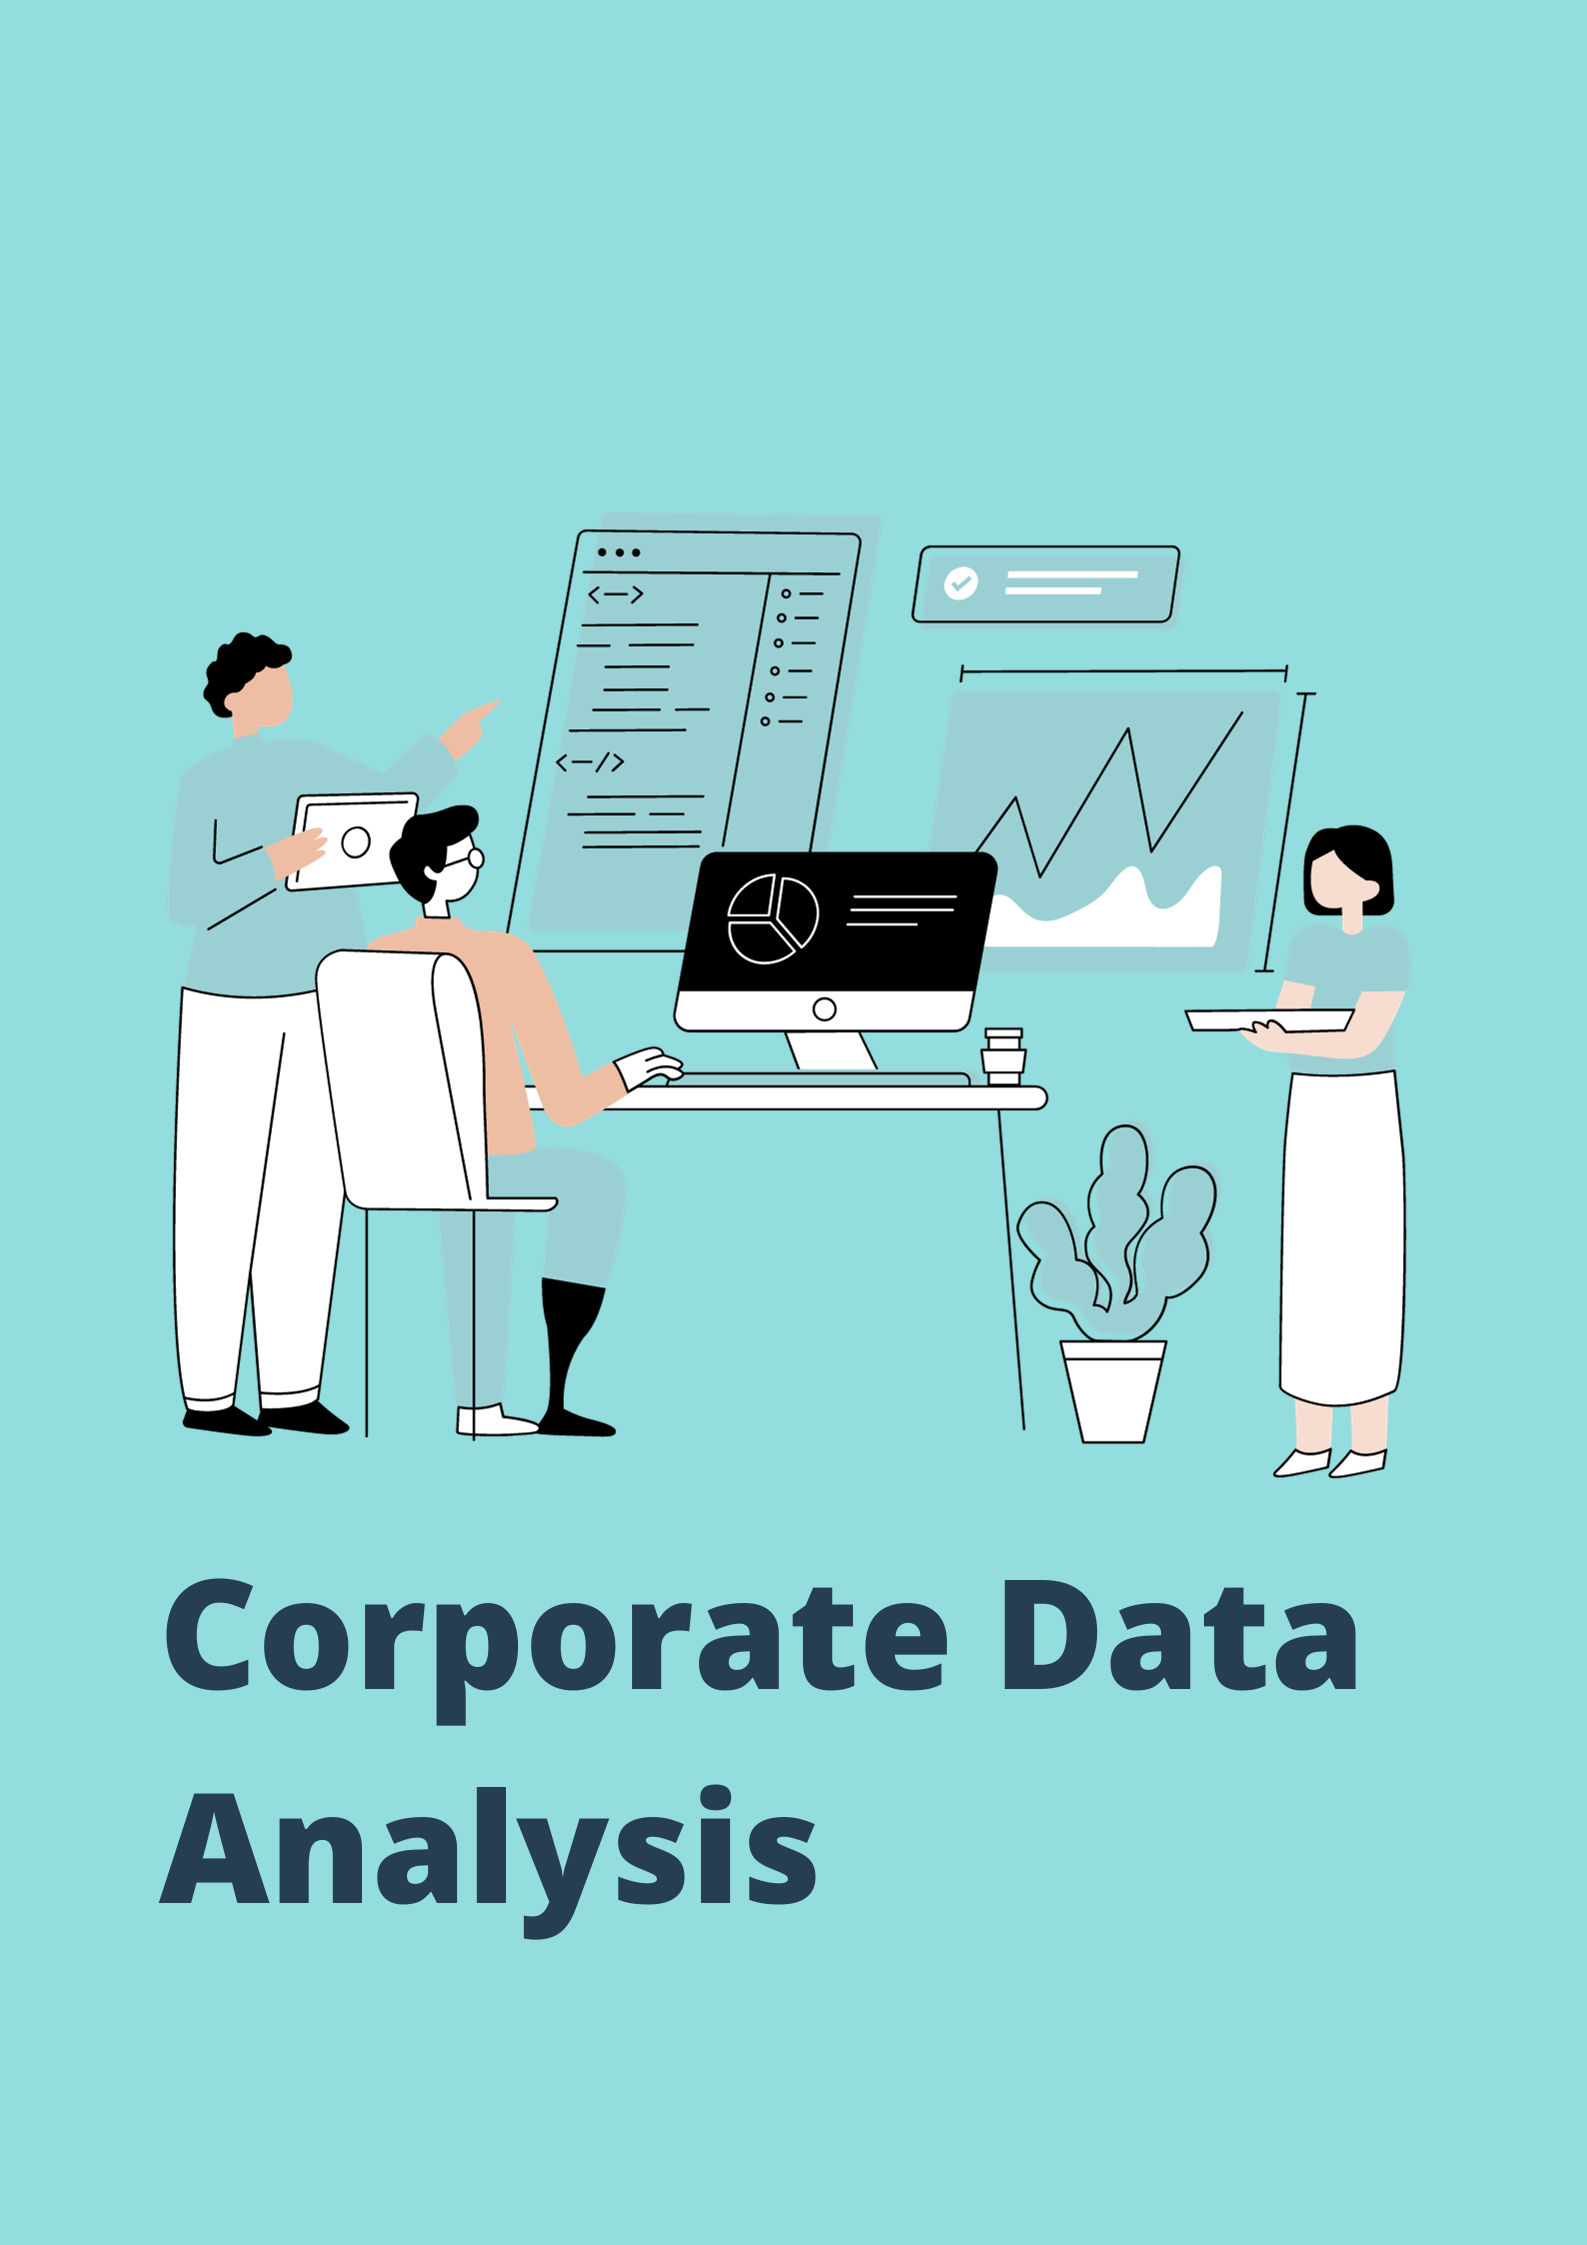

# Importing Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import plotly.express as px
from wordcloud import WordCloud

# Reading DataSet

In [3]:
df = pd.read_csv('/kaggle/input/bigpicture-company-dataset/companies-2023-q4-sm.csv')

In [4]:
df.head()

handle  \
0                 company/&-shayna-solution-partners   
1          company/'addinall-management-and-systems'   
2  company/'baden-regio'-gemeinden-region-baden-w...   
3  company/'friends-with-rice'â€‹-stichting-'vriend...   
4  company/'i-say'-supported-living-services-limited   

                                                name              website  \
0                         & Shayna solution partners        andshayna.com   
1                  'Addinall Management and Systems'                  NaN   
2    'Baden Regio', Gemeinden Region Baden-Wettingen       baden-regio.ch   
3  'Friends With Rice' / Stichting 'Vrienden Met ...  vriendenmetrijst.nl   
4          'I SAY' SUPPORTED LIVING SERVICES LIMITED                  NaN   

                             industry  size         type  founded       city  \
0                              retail  1-10  Partnership      NaN        NaN   
1    business consulting and services   NaN          NaN      NaN        NaN   
2                                 NaN   NaN          NaN      NaN  Wettingen   
3  philanthropic fundraising services  1-10    Nonprofit   2014.0      Lisse   
4                   consumer services   NaN          NaN      NaN  Rochester   

           state country_code  
0            NaN          NaN  
1            NaN          NaN  
2         Aargau           CH  
3  South Holland           NL  
4        England           GB

In [5]:
df.shape

(17154017, 10)

# ðŸ“ˆ Visualization

#### 1. Top 10 Industries

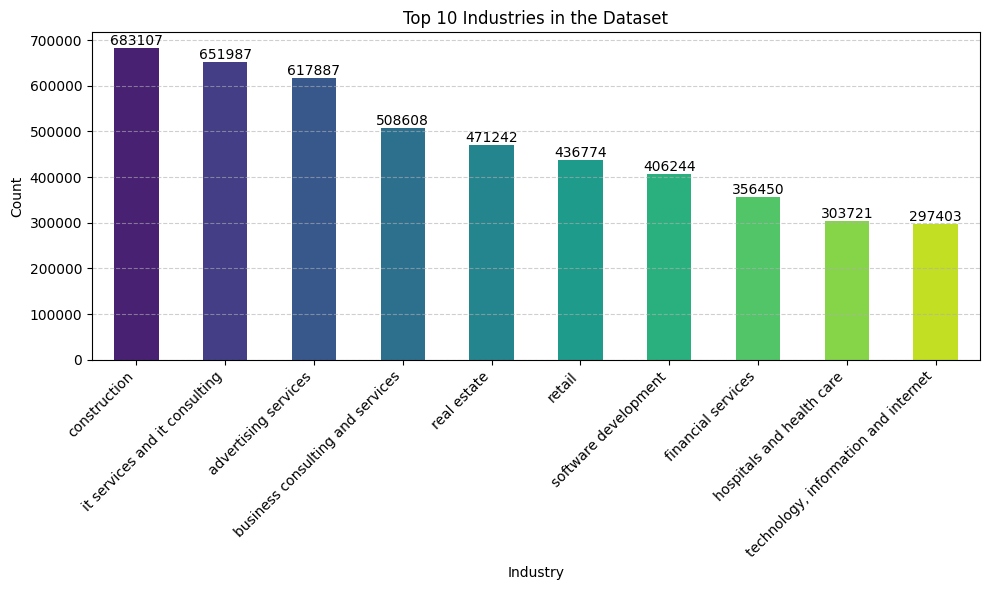

In [23]:
industry_distribution = df['industry'].value_counts()

# Select the top 10 industries
top_industries = industry_distribution.head(10)

# Use a colorful palette from seaborn
colors = sns.color_palette('viridis', len(top_industries))

# Plot a vertical bar chart for the top 10 industries
plt.figure(figsize=(10, 6))
top_industries.sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Top 10 Industries in the Dataset')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the count values on the bars
for index, value in enumerate(top_industries.sort_values(ascending=False)):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#### 2. Industry Trend over Time

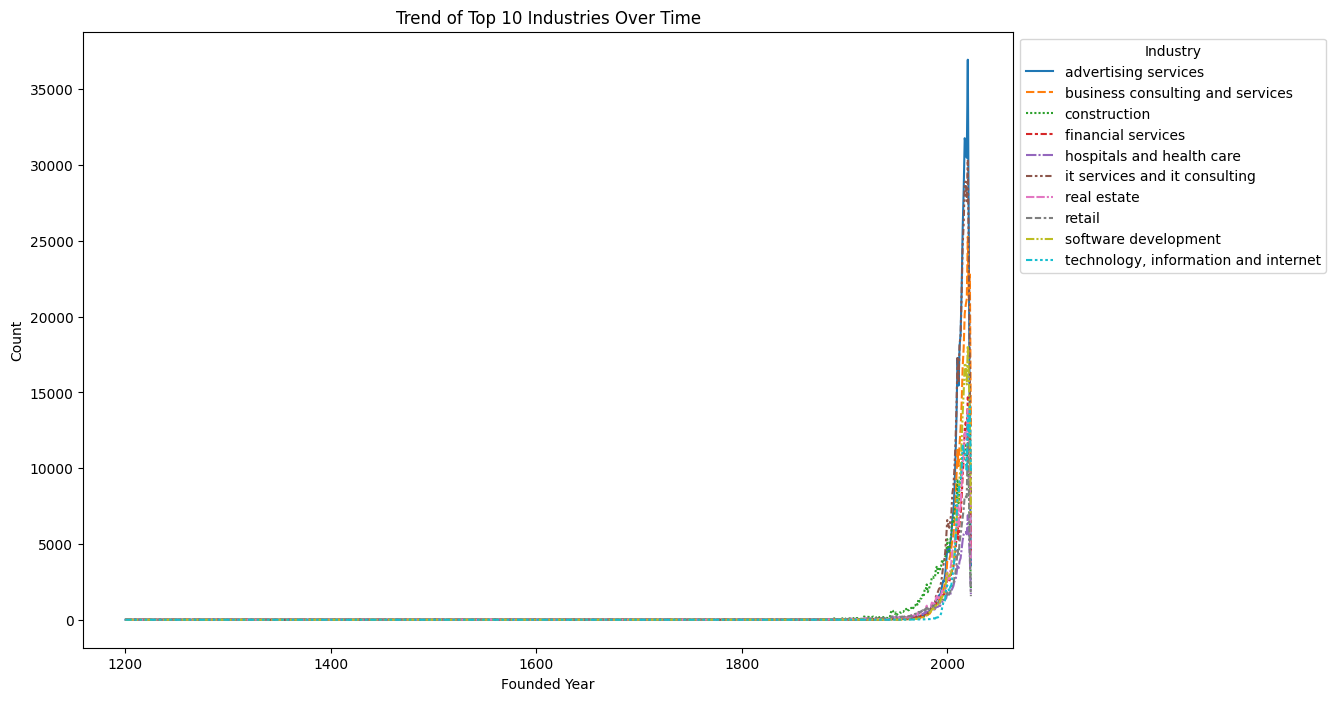

In [8]:
top_industries = df['industry'].value_counts().head(10).index

# Filter the dataset for the top 10 industries
top_industries_data = df[df['industry'].isin(top_industries)]

# Group by 'industry' and 'founded' and calculate counts
industry_trends = top_industries_data.groupby(['industry', 'founded']).size().unstack(fill_value=0)

# Plot the trend data
plt.figure(figsize=(12, 8))
sns.lineplot(data=industry_trends.T)  # Transpose the data for better visualization
plt.title('Trend of Top 10 Industries Over Time')
plt.xlabel('Founded Year')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

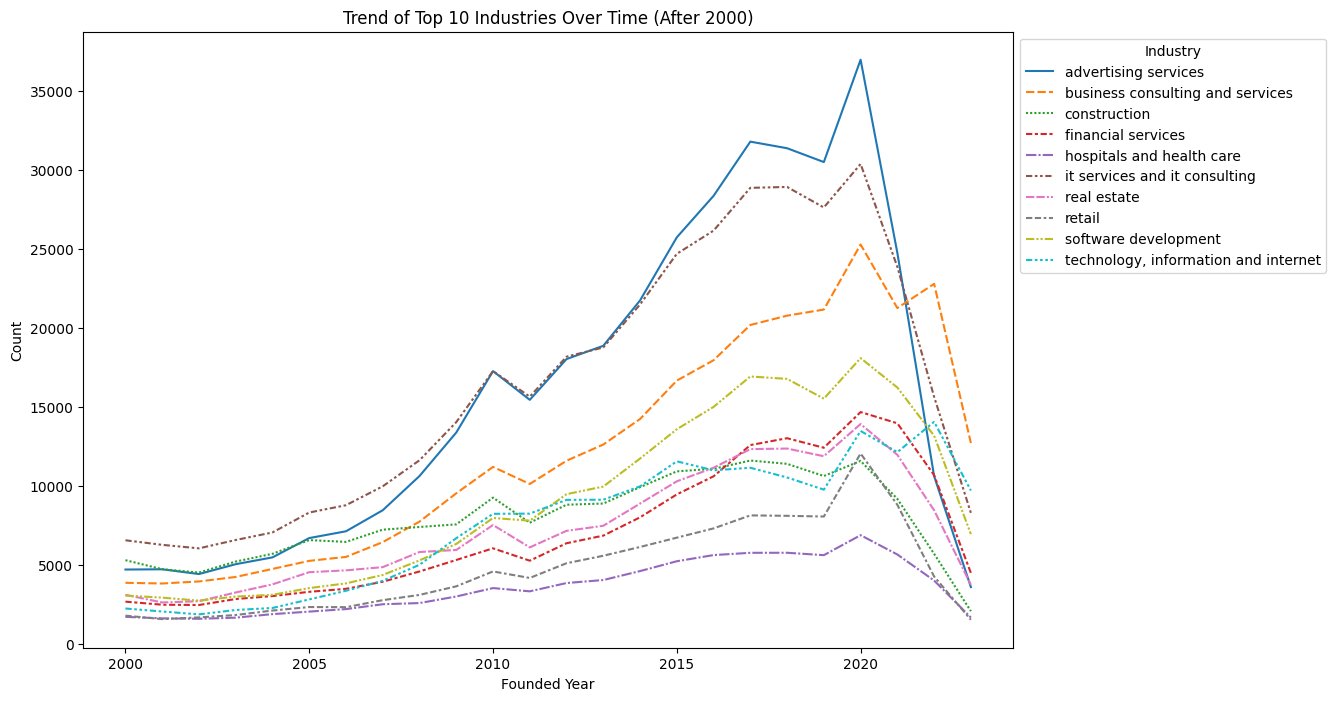

In [9]:
top_industries = df['industry'].value_counts().head(10).index

# Filter the dataset for the top 10 industries and years after 2000
top_industries_data = df[(df['industry'].isin(top_industries)) & (df['founded'] >= 2000)]

# Group by 'industry' and 'founded' and calculate counts
industry_trends = top_industries_data.groupby(['industry', 'founded']).size().unstack(fill_value=0)

# Plot the trend data
plt.figure(figsize=(12, 8))
sns.lineplot(data=industry_trends.T)  # Transpose the data for better visualization
plt.title('Trend of Top 10 Industries Over Time (After 2000)')
plt.xlabel('Founded Year')
plt.ylabel('Count')
plt.legend(title='Industry', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

#### 3. Size Distribution

In [10]:
df['size'].unique()

array(['1-10', nan, '11-50', '1K-5K', '51-200', '201-500', '501-1K',
       '5K-10K', '10K+'], dtype=object)

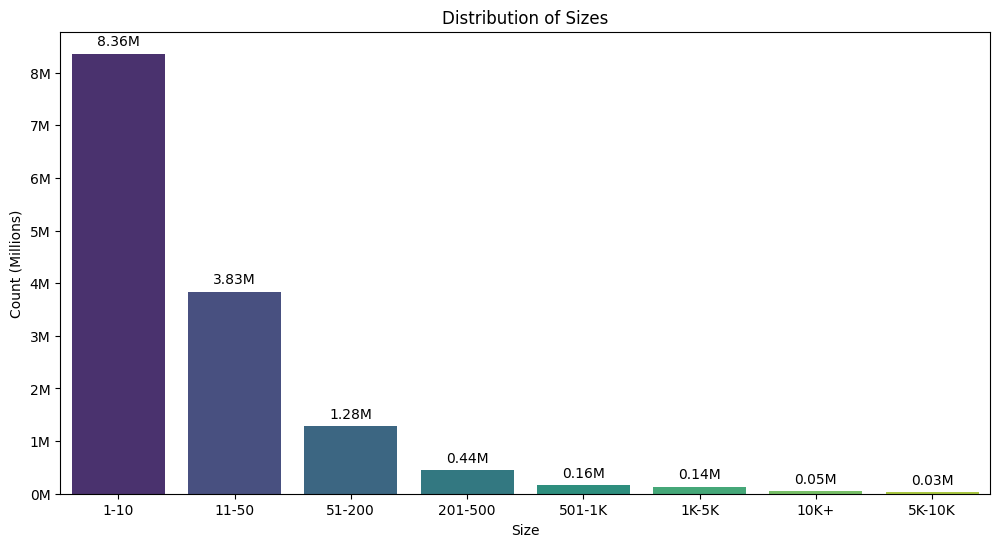

In [11]:
sizes = df['size'].dropna()

# Count the occurrences of each size category
size_counts = sizes.value_counts()

# Plot the distribution of sizes with seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=size_counts.index, y=size_counts.values / 1e6, palette='viridis')

# Display the count values on the bars in millions
for index, value in enumerate(size_counts.values):
    plt.text(index, (value / 1e6) + 0.1, f'{value / 1e6:.2f}M', ha='center', va='bottom', fontsize=10)

# Format y-axis to show values in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Distribution of Sizes')
plt.xlabel('Size')
plt.ylabel('Count (Millions)')
plt.show()


#### 4. Distribution of Entity Types

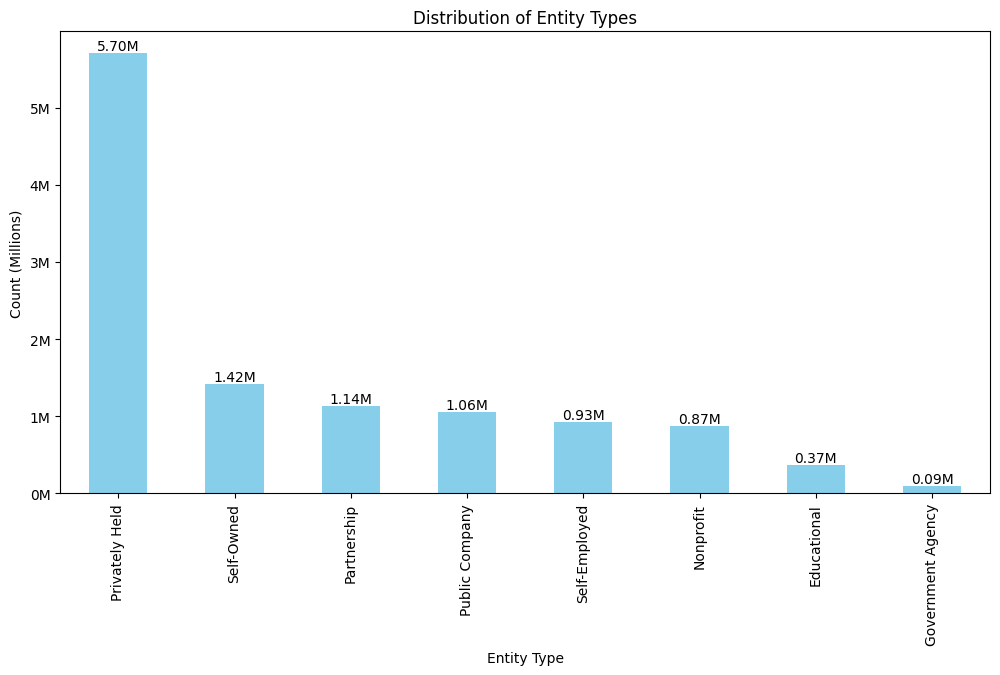

In [12]:
entity_types = df['type'].dropna()

# Count the occurrences of each entity type
type_counts = entity_types.value_counts()

# Plot a bar chart to visualize the distribution of entity types with counts in millions
plt.figure(figsize=(12, 6))
ax = type_counts.plot(kind='bar', color='skyblue')

# Display the count values on the bars in millions
for index, value in enumerate(type_counts.values):
    plt.text(index, value + 0.1, f'{value / 1e6:.2f}M', ha='center', va='bottom', fontsize=10)

# Format y-axis to show values in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 1e6:.0f}M'))

plt.title('Distribution of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count (Millions)')
plt.show()

#### 5. Geographical Analysis

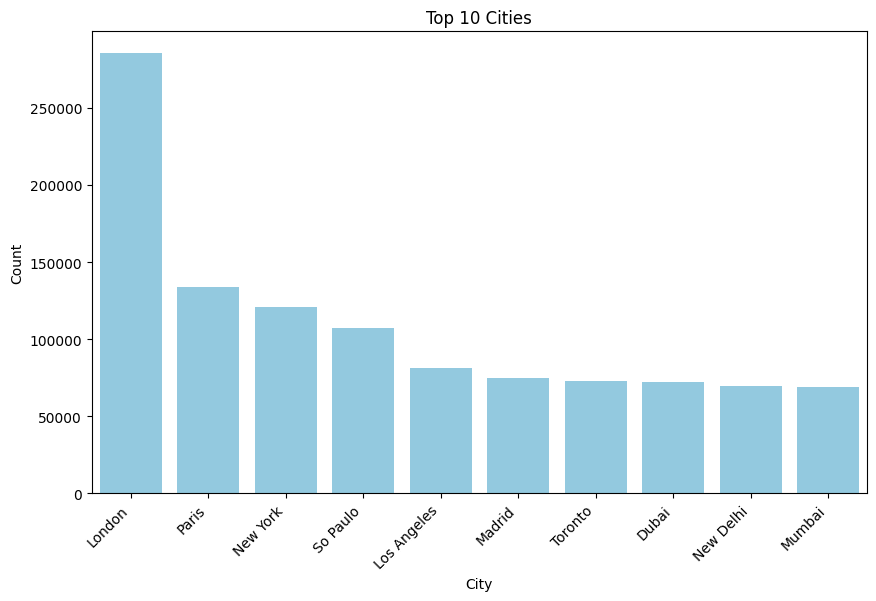

In [13]:
cities_distribution = df['city'].value_counts().head(10)

# Plot the distribution of entities across cities
plt.figure(figsize=(10, 6))
sns.barplot(x=cities_distribution.index, y=cities_distribution.values, color='skyblue')
plt.title('Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

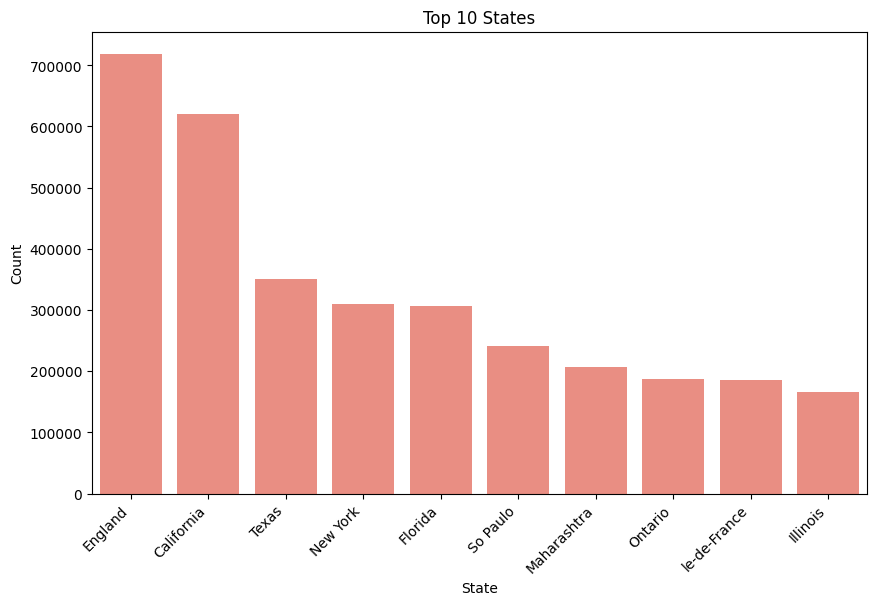

In [14]:
states_distribution = df['state'].value_counts().head(10)

# Plot the distribution of entities across states
plt.figure(figsize=(10, 6))
sns.barplot(x=states_distribution.index, y=states_distribution.values, color='salmon')
plt.title('Top 10 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

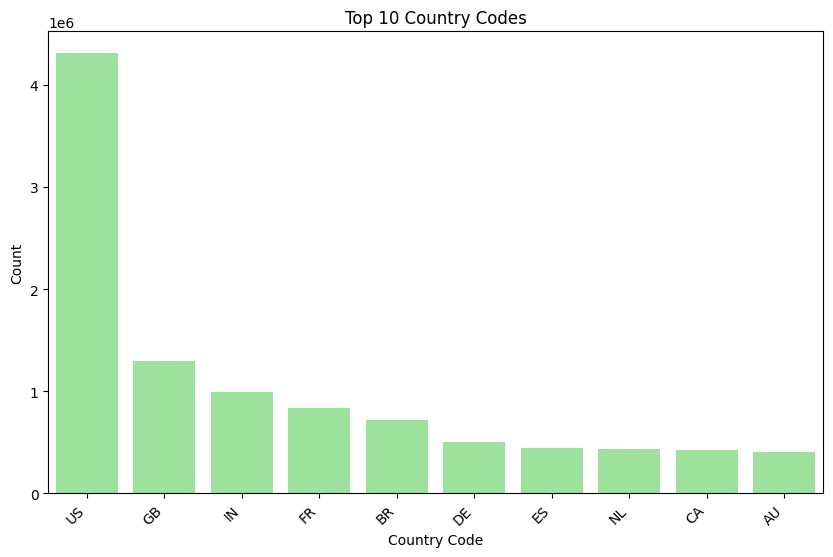

In [15]:
countries_distribution = df['country_code'].value_counts().head(10)

# Plot the distribution of entities across country codes
plt.figure(figsize=(10, 6))
sns.barplot(x=countries_distribution.index, y=countries_distribution.values, color='lightgreen')
plt.title('Top 10 Country Codes')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 6. Trend of founding year over Time

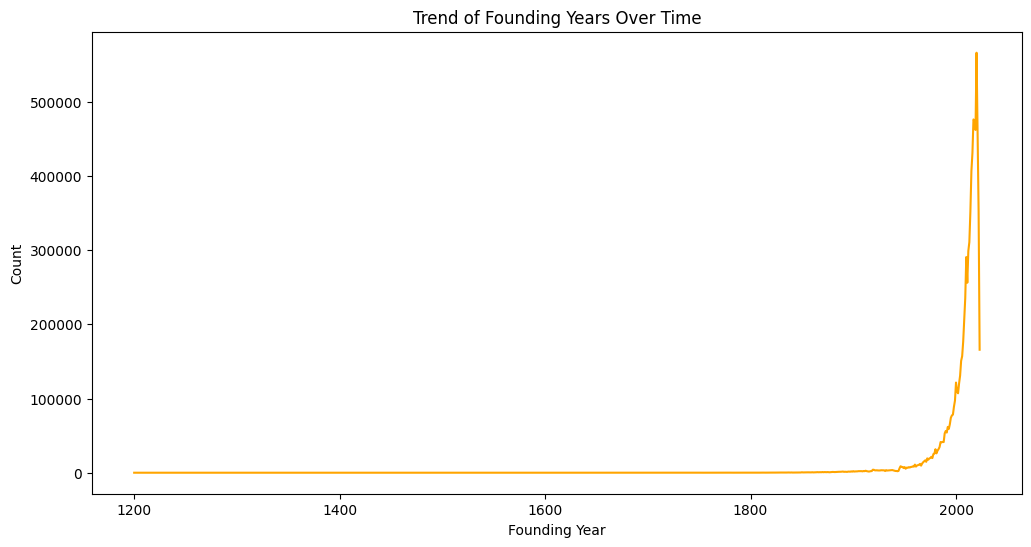

In [16]:
# Group by founding year and calculate counts
founding_year_trends = df['founded'].dropna().astype(int).value_counts().sort_index()

# Plot the trend of founding years over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=founding_year_trends.index, y=founding_year_trends.values, color='orange')
plt.title('Trend of Founding Years Over Time')
plt.xlabel('Founding Year')
plt.ylabel('Count')
plt.show()

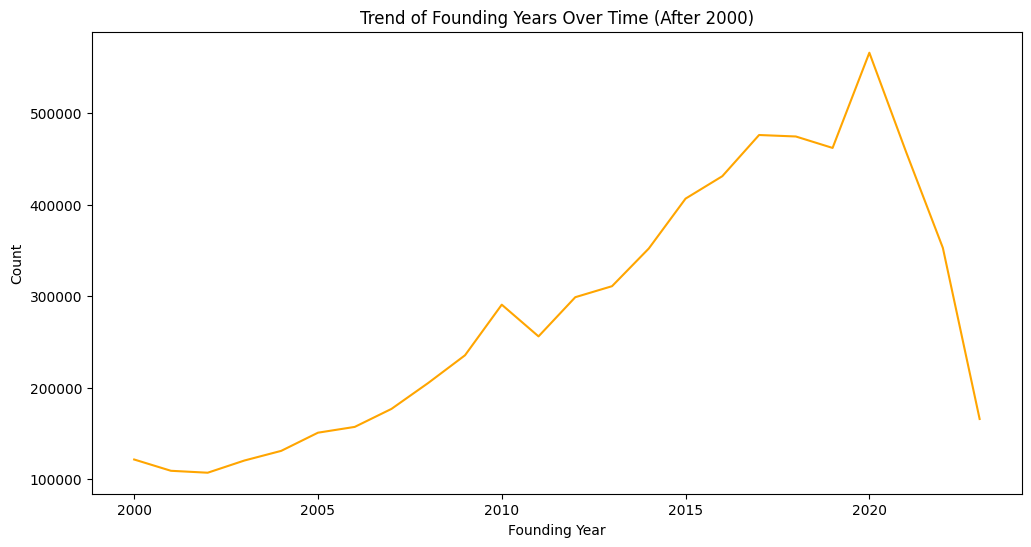

In [17]:
founding_years = df['founded'].dropna()

# Filter data for entities founded after 2000
founding_years_after_2000 = founding_years[founding_years >= 2000]

# Group by founding year and calculate counts for entities founded after 2000
founding_year_trends_after_2000 = founding_years_after_2000.astype(int).value_counts().sort_index()

# Plot the trend of founding years over time (after 2000)
plt.figure(figsize=(12, 6))
sns.lineplot(x=founding_year_trends_after_2000.index, y=founding_year_trends_after_2000.values, color='orange')
plt.title('Trend of Founding Years Over Time (After 2000)')
plt.xlabel('Founding Year')
plt.ylabel('Count')
plt.show()

#### 7. Global Company Distribution by Country

In [18]:
# converting iso2 to iso3 country codes because choropleth does not support iso2 code
iso2_to_iso3 = {
    'US': 'USA', 'GB': 'GBR', 'IN': 'IND', 'FR': 'FRA', 'BR': 'BRA',
    'DE': 'DEU', 'ES': 'ESP', 'NL': 'NLD', 'CA': 'CAN', 'AU': 'AUS',
    'IT': 'ITA', 'CN': 'CHN', 'BE': 'BEL', 'TR': 'TUR', 'ZA': 'ZAF',
    'MX': 'MEX', 'CH': 'CHE', 'AE': 'ARE', 'PL': 'POL', 'ID': 'IDN',
    'AR': 'ARG', 'SE': 'SWE', 'PT': 'PRT', 'PK': 'PAK', 'DK': 'DNK',
    'CO': 'COL', 'NG': 'NGA', 'SG': 'SGP', 'PE': 'PER', 'CL': 'CHL',
    'NO': 'NOR', 'NZ': 'NZL', 'IE': 'IRL', 'AT': 'AUT', 'MY': 'MYS',
    'EG': 'EGY', 'BD': 'BGD', 'IR': 'IRN', 'FI': 'FIN', 'CZ': 'CZE',
    'PH': 'PHL', 'RO': 'ROU', 'IL': 'ISR', 'SA': 'SAU', 'JP': 'JPN',
    'HK': 'HKG', 'VN': 'VNM', 'KE': 'KEN', 'GR': 'GRC', 'UA': 'UKR',
    'HU': 'HUN', 'RU': 'RUS', 'EC': 'ECU', 'LK': 'LKA', 'TH': 'THA',
    'BG': 'BGR', 'RS': 'SRB', 'KR': 'KOR', 'LT': 'LTU', 'HR': 'HRV',
    'GH': 'GHA', 'TW': 'TWN', 'TN': 'TUN', 'SK': 'SVK', 'EE': 'EST',
    'MA': 'MAR', 'UY': 'URY', 'JO': 'JOR', 'CY': 'CYP', 'VE': 'VEN',
    'NP': 'NPL', 'LU': 'LUX', 'SI': 'SVN', 'DZ': 'DZA', 'QA': 'QAT',
    'LB': 'LBN', 'GT': 'GTM', 'LV': 'LVA', 'GE': 'GEO', 'SN': 'SEN',
    'CR': 'CRI', 'DO': 'DOM', 'CI': 'CIV', 'UG': 'UGA', 'KW': 'KWT',
    'TZ': 'TZA', 'ZW': 'ZWE', 'IQ': 'IRQ', 'KH': 'KHM', 'PR': 'PRI',
    'AM': 'ARM', 'CM': 'CMR', 'AO': 'AGO', 'MU': 'MUS', 'AZ': 'AZE',
    'OM': 'OMN', 'PA': 'PAN', 'KZ': 'KAZ', 'BA': 'BIH', 'MM': 'MMR',
    'MK': 'MKD', 'ET': 'ETH', 'ZM': 'ZMB', 'PY': 'PRY', 'SV': 'SLV',
    'MZ': 'MOZ', 'BY': 'BLR', 'CD': 'COD', 'BO': 'BOL', 'TT': 'TTO',
    'IS': 'ISL', 'JM': 'JAM', 'HN': 'HND', 'RE': 'REU', 'BH': 'BHR',
    'AL': 'ALB', 'AF': 'AFG', 'MG': 'MDG', 'BJ': 'BEN', 'MT': 'MLT',
    'UZ': 'UZB', 'MD': 'MDA', 'RW': 'RWA', 'SD': 'SDN', 'BW': 'BWA',
    'MC': 'MCO', 'NI': 'NIC', 'BF': 'BFA', 'LY': 'LBY', 'MV': 'MDV',
    'PG': 'PNG', 'TG': 'TGO', 'PS': 'PSE', 'MW': 'MWI', 'CG': 'COG',
    'SY': 'SYR', 'MQ': 'MTQ', 'GP': 'GLP', 'GN': 'GIN', 'ML': 'MLI',
    'LI': 'LIE', 'AD': 'AND', 'IM': 'IMN', 'GA': 'GAB', 'CW': 'CUW',
    'GI': 'GIB', 'YE': 'YEM', 'HT': 'HTI', 'BM': 'BMU', 'MN': 'MNG',
    'FJ': 'FJI', 'VG': 'VGB', 'ME': 'MNE', 'BS': 'BHS', 'KY': 'CYM',
    'SR': 'SUR', 'CU': 'CUB', 'TJ': 'TJK', 'PF': 'PYF', 'SZ': 'SWZ',
    'LR': 'LBR', 'SL': 'SLE', 'KG': 'KGZ', 'SM': 'SMR', 'AW': 'ABW',
    'BB': 'BRB', 'BZ': 'BLZ', 'GG': 'GGY', 'GY': 'GUY', 'SO': 'SOM',
    'GF': 'GUF', 'GM': 'GMB', 'VI': 'VIR', 'LS': 'LSO', 'MR': 'MRT',
    'TD': 'TCD', 'BN': 'BRN', 'NE': 'NER', 'SS': 'SSD', 'FO': 'FRO',
    'JE': 'JEY', 'BT': 'BTN', 'BI': 'BDI', 'DJ': 'DJI', 'TM': 'TKM',
    'LC': 'LCA', 'NC': 'NCL', 'VU': 'VUT', 'YT': 'MYT', 'GU': 'GUM',
    'SC': 'SYC', 'GD': 'GRD', 'GL': 'GRL', 'LA': 'LAO', 'GQ': 'GNQ',
    'TC': 'TCA', 'VC': 'VCT', 'CV': 'CPV', 'AX': 'ALA', 'MO': 'MAC',
    'BQ': 'BES', 'AG': 'ATG', 'CF': 'CAF', 'SX': 'SXM', 'DM': 'DMA',
    'AI': 'AIA', 'TL': 'TLS', 'KM': 'COM', 'KN': 'KNA', 'MH': 'MHL',
    'GW': 'GNB', 'TUV': 'TUV', 'SB': 'SLB', 'MP': 'MNP', 'CK': 'COK', 'WS': 'WSM', 'USA': 'USA', 'MF': 'MAF',
    'PW': 'PLW', 'BL': 'BLM', 'FM': 'FSM', 'ST': 'STP', 'FK': 'FLK', 'IO': 'IOT',
    'WF': 'WLF', 'TF': 'ATF', 'ER': 'ERI', 'KP': 'PRK', 'AS': 'ASM', 'TO': 'TON',
    'PM': 'SPM', 'KI': 'KIR', 'MNE': 'MNE', 'AZE': 'AZE', 'CHE': 'CHE', 'SJ': 'SJM',
    'CX': 'CXR', 'CYM': 'CYM', 'MS': 'MSR', 'VA': 'VAT', 'BLR': 'BLR', 'IND': 'IND',
    'CAN': 'CAN', 'SH': 'SHN', 'NF': 'NFK', 'TK': 'TKL', 'AQ': 'ATA', 'SXM': 'SXM',
    'BGD': 'BGD', 'XK': 'XKX', 'MLT': 'MLT', 'MKD': 'MKD', 'AND': 'AND', 'COL': 'COL',
    'PAN': 'PAN', 'ISR': 'ISR', 'NU': 'NIU', 'UM': 'UMI', 'JOR': 'JOR', 'KEN': 'KEN',
    'MDA': 'MDA', 'NOR': 'NOR', 'MNG': 'MNG', 'SRB': 'SRB', 'MAC': 'MAC', 'CC': 'CCK',
    'PER': 'PER', 'MAR': 'MAR', 'GEO': 'GEO', 'NR': 'NRU', 'EH': 'ESH'
}

In [19]:
df['country_code_iso3'] = df['country_code'].map(iso2_to_iso3)

# Group by country and calculate the count of companies
country_counts = df.groupby('country_code_iso3').size().reset_index(name='company_count')

# Use the 'country_code_iso3' column for visualization
fig = px.choropleth(country_counts, 
                    locations='country_code_iso3', 
                    color='company_count',
                    hover_name='country_code_iso3',
                    title='Global Company Distribution by Country',
                    color_continuous_scale="YlOrRd",
                    projection='natural earth',  # Changed to a different projection
                    locationmode='ISO-3',
                    range_color=(0, 20),
                    template='plotly_dark'  # Dark template for a modern look
                   )

fig.update_geos(
    showcoastlines=True, coastlinecolor="white", showland=True, landcolor="black"
)

fig.update_layout(
    margin={"r":0,"t":40,"l":0,"b":0},
    geo=dict(bgcolor='rgba(0,0,0,0)'),
)

fig.show()


#### 8. Online Presence

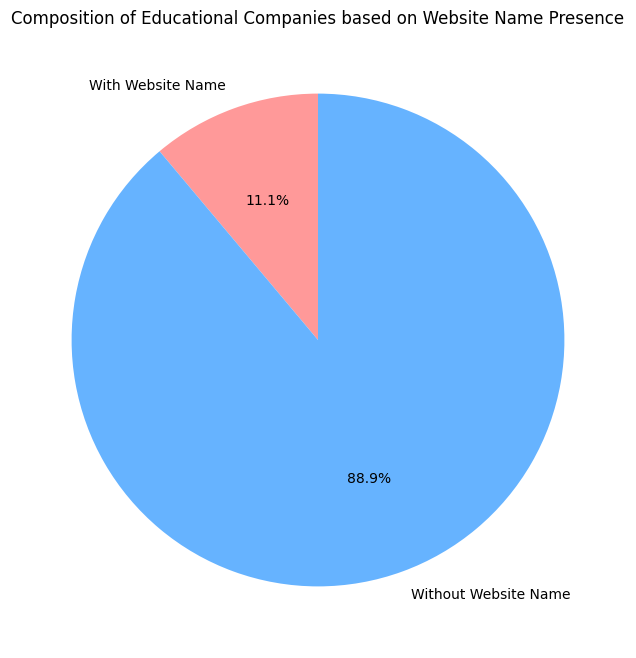

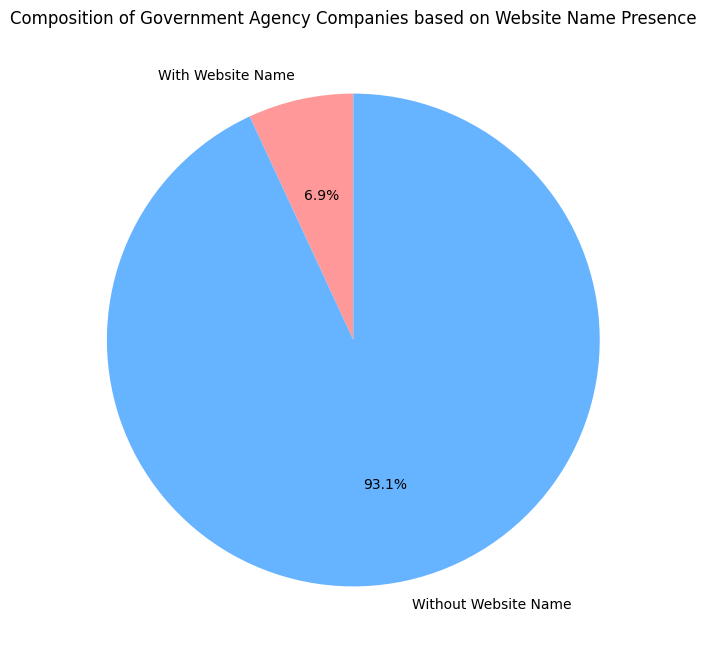

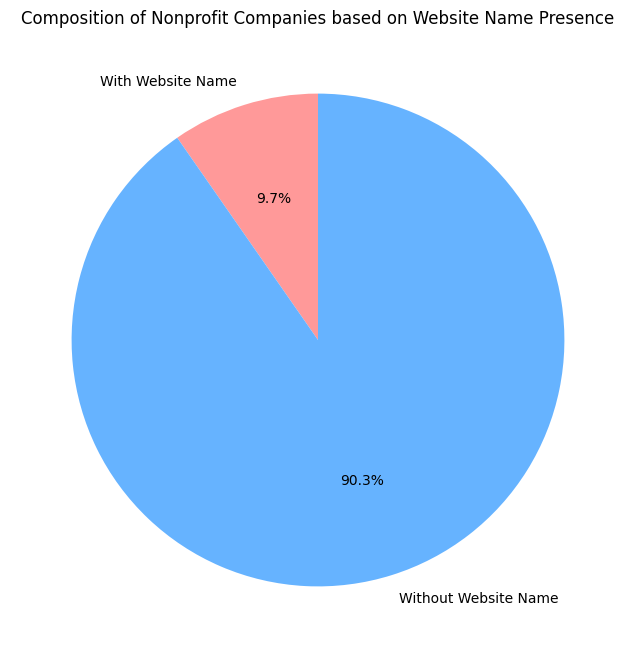

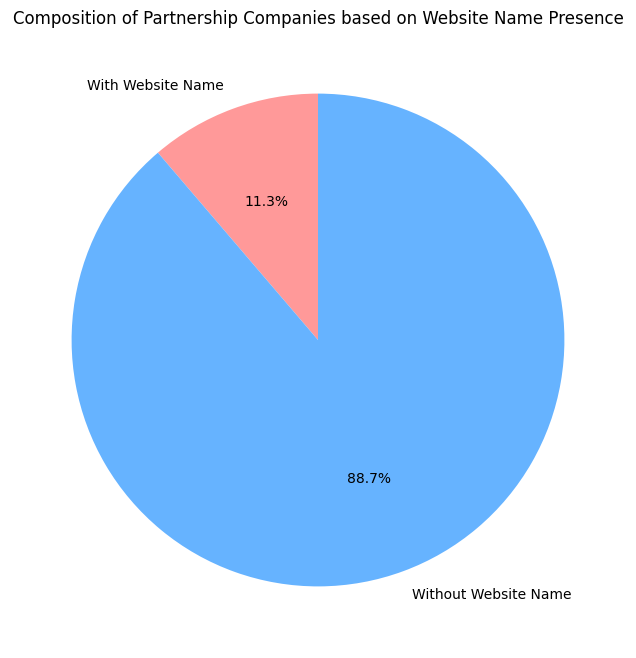

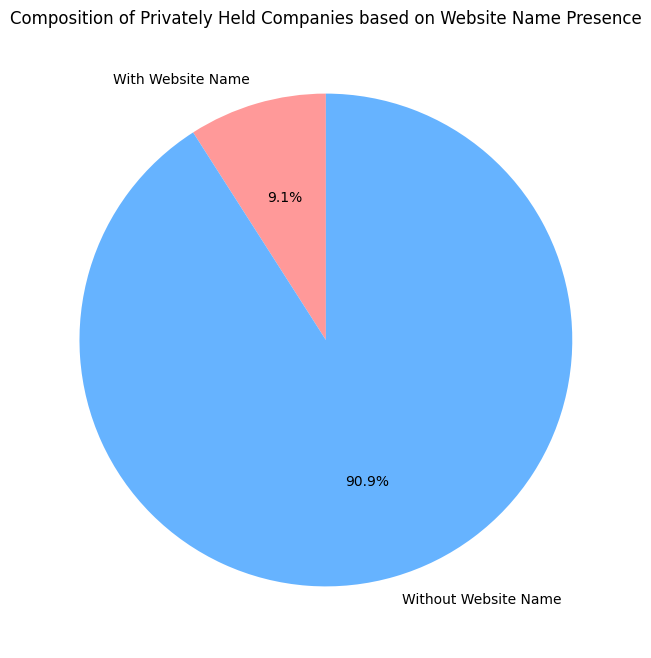

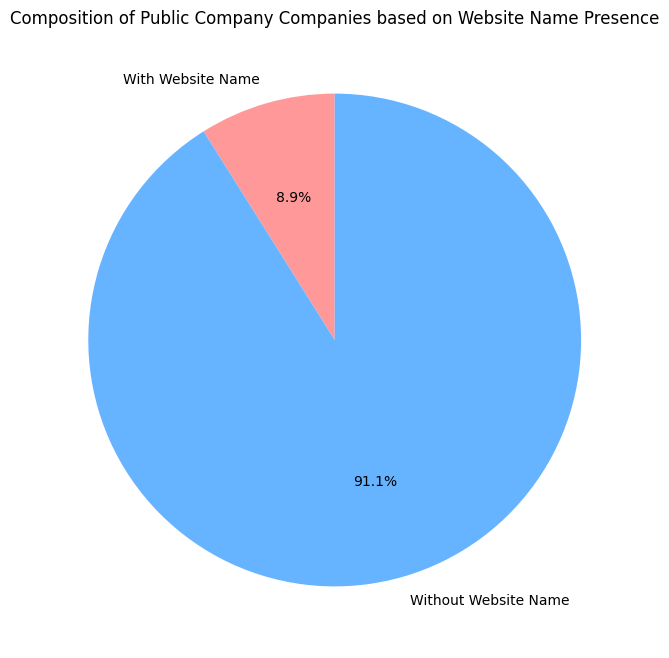

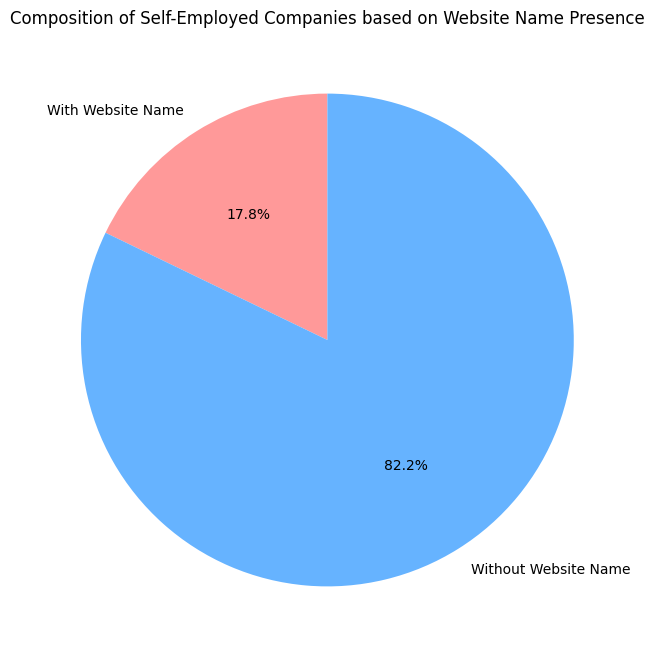

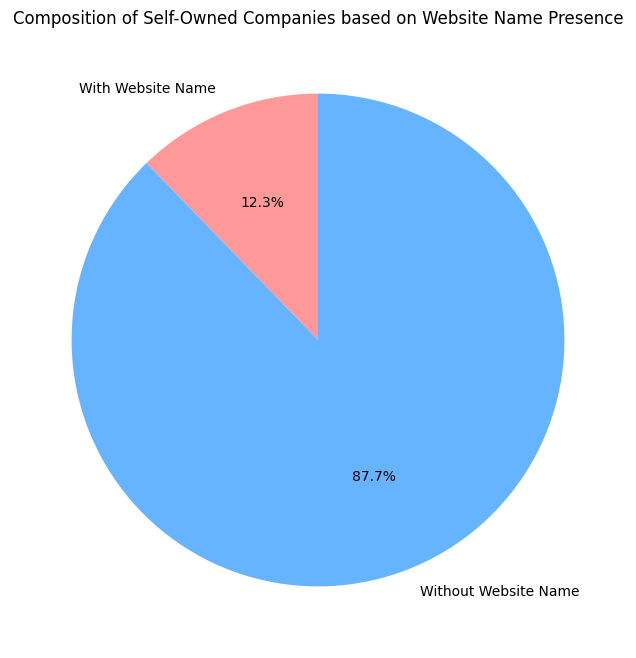

In [20]:
# Group by 'type' and calculate the count of companies with and without a website name
composition_df = df.groupby(['type', df['website'].notna()]).size().unstack(fill_value=0)

# Reset the index to ensure 'type' is a regular column
composition_df = composition_df.reset_index()

# Rename the columns for better clarity
composition_df.columns = ['type', 'with_website_name', 'without_website_name']

# Calculate the total count for each entity type
composition_df['total'] = composition_df['with_website_name'] + composition_df['without_website_name']

# Plot pie charts for each entity type
entity_types = composition_df['type']
colors = ['#ff9999', '#66b3ff']

for entity_type in entity_types:
    labels = ['With Website Name', 'Without Website Name']
    sizes = composition_df.loc[composition_df['type'] == entity_type, ['with_website_name', 'without_website_name']].values.flatten()
    total = sizes.sum()
    percentages = sizes / total * 100

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '', colors=colors, startangle=90)
    plt.title(f'Composition of {entity_type} Companies based on Website Name Presence')
    plt.show()


#### 9. Top 10 domains used

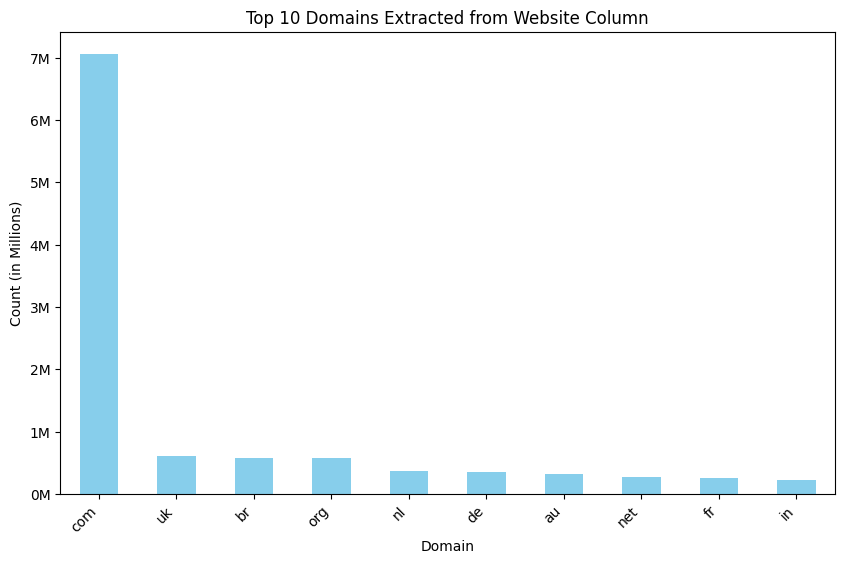

In [22]:
# Extract domains from the 'website' column
df['domain'] = df['website'].str.split('.').str[-1]

# Count the occurrences of each domain
top_domains = df['domain'].value_counts().head(10)

# Plot the top 10 domains
plt.figure(figsize=(10, 6))
top_domains.plot(kind='bar', color='skyblue')

# Format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x/1e6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Top 10 Domains Extracted from Website Column')
plt.xlabel('Domain')
plt.ylabel('Count (in Millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 10. Handles Word cloud

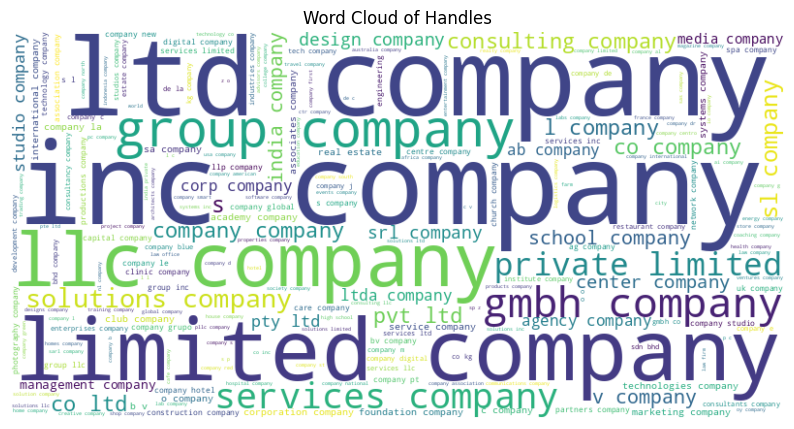

In [6]:
# Sample a fraction of the data 
sampled_df = df.sample(frac=0.4, random_state=42)  # 10% of the data

# Combine all handles into a single string
all_handles = ' '.join(sampled_df['handle'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_handles)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Handles')
plt.show()

# Conlusion

Thank you for accompanying me through this enlightening journey of exploratory data analysis (EDA). Even though I have only scratched the surface of the dataset's potential, I have gained the insights I sought. This exploration has bestowed upon me valuable knowledge and answered the questions that plagued my mind. While there are numerous other possible conclusions and analyses, I have decided to end my EDA here.

I trust that you found my notebook engaging and, more importantly, beneficial. I welcome any feedback you may have, and I assure you that I read and respond to each one with utmost sincerity.

I wish you the best of luck in your endeavors!